In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("soc.xlsx")

In [3]:
df.shape

(9994, 21)

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,3,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,4,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,5,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [172]:
furniture = df.loc[df['Category'] == 'Furniture']

In [6]:
furniture.shape

(2121, 21)

In [7]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [8]:

furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [9]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount','Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [10]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
furniture.head()

,Order Date,Sales
7,2014-01-06,2573.820
14,2014-01-07,76.728
19,2014-01-10,51.940
20,2014-01-11,9.940
26,2014-01-13,545.940


In [12]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()


In [13]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [14]:
furniture.shape

(889, 2)

In [15]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [16]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [17]:
furniture.shape

(889, 1)

In [18]:
y_furniture = furniture.resample('M').sum()

In [19]:
y_furniture

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


In [20]:
y_furniture.shape

(48, 1)

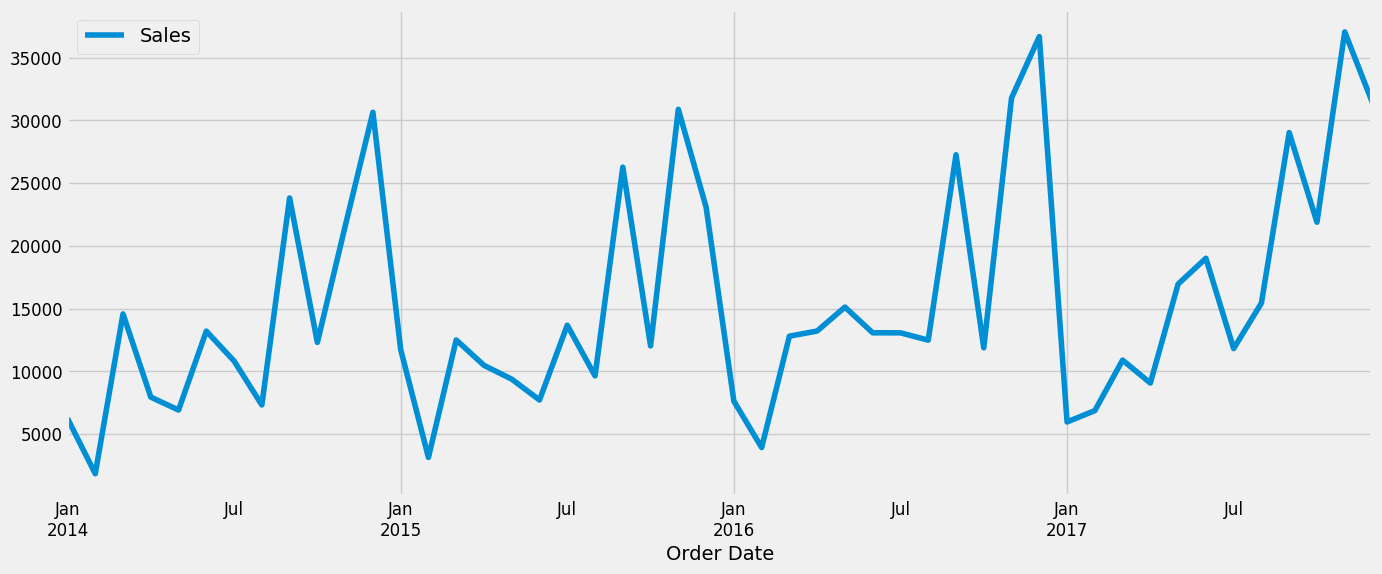

In [21]:
y_furniture.plot(figsize=(15, 6))
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
test_result=adfuller(y_furniture['Sales'])


In [24]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adfuller_test(y_furniture['Sales'])

ADF Test Statistic : -4.699026242828902
p-value : 8.450793985809671e-05
#Lags Used : 0
Number of Observations Used : 47
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

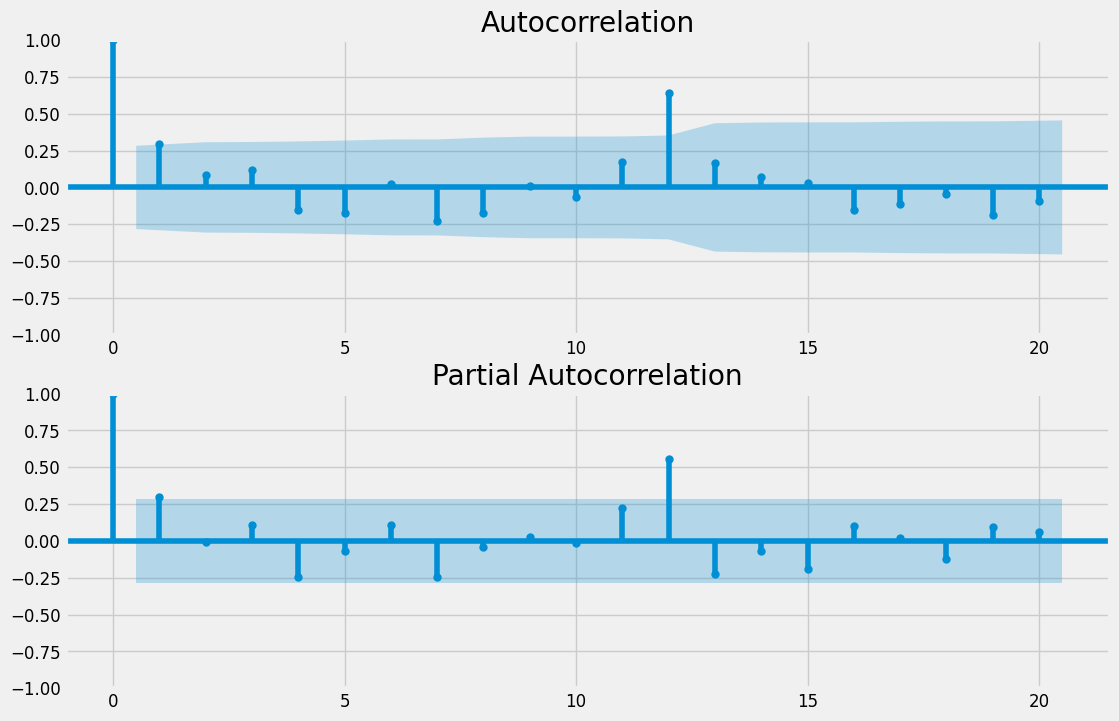

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y_furniture['Sales'].iloc[0:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_furniture['Sales'].iloc[0:],lags=20,ax=ax2)

In [28]:
y_furniture['Sales First Difference'] = y_furniture['Sales'] - y_furniture['Sales'].shift(1)

In [29]:
y_furniture['Sales'].shift(1)

Order Date
2014-01-31           NaN
2014-02-28     6242.5250
2014-03-31     1839.6580
2014-04-30    14573.9560
2014-05-31     7944.8370
2014-06-30     6912.7870
2014-07-31    13206.1256
2014-08-31    10821.0510
2014-09-30     7320.3465
2014-10-31    23816.4808
2014-11-30    12304.2470
2014-12-31    21564.8727
2015-01-31    30645.9665
2015-02-28    11739.9416
2015-03-31     3134.3740
2015-04-30    12499.7830
2015-05-31    10475.6985
2015-06-30     9374.9505
2015-07-31     7714.1790
2015-08-31    13674.4200
2015-09-30     9638.5922
2015-10-31    26273.0230
2015-11-30    12026.6235
2015-12-31    30880.8325
2016-01-31    23085.8192
2016-02-29     7622.7430
2016-03-31     3925.5510
2016-04-30    12801.0920
2016-05-31    13212.0900
2016-06-30    15119.8350
2016-07-31    13070.5720
2016-08-31    13068.5190
2016-09-30    12483.2323
2016-10-31    27262.8809
2016-11-30    11872.5770
2016-12-31    31783.6288
2017-01-31    36678.7150
2017-02-28     5964.0320
2017-03-31     6866.3374
2017-04-30    

In [30]:
y_furniture['Seasonal First Difference']=y_furniture['Sales']-y_furniture['Sales'].shift(12)

In [31]:
y_furniture.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Order Date,,,
2014-01-31,6242.5250,NaN,NaN
2014-02-28,1839.6580,-4402.8670,NaN
2014-03-31,14573.9560,12734.2980,NaN
2014-04-30,7944.8370,-6629.1190,NaN
2014-05-31,6912.7870,-1032.0500,NaN
2014-06-30,13206.1256,6293.3386,NaN
2014-07-31,10821.0510,-2385.0746,NaN
2014-08-31,7320.3465,-3500.7045,NaN
2014-09-30,23816.4808,16496.1343,NaN


In [32]:
adfuller_test(y_furniture['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.373182378902411
p-value : 2.317914371466221e-08
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Order Date'>

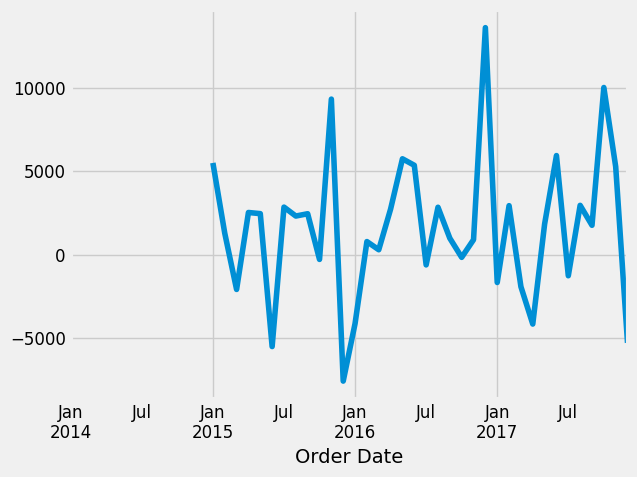

In [33]:
y_furniture['Seasonal First Difference'].plot()

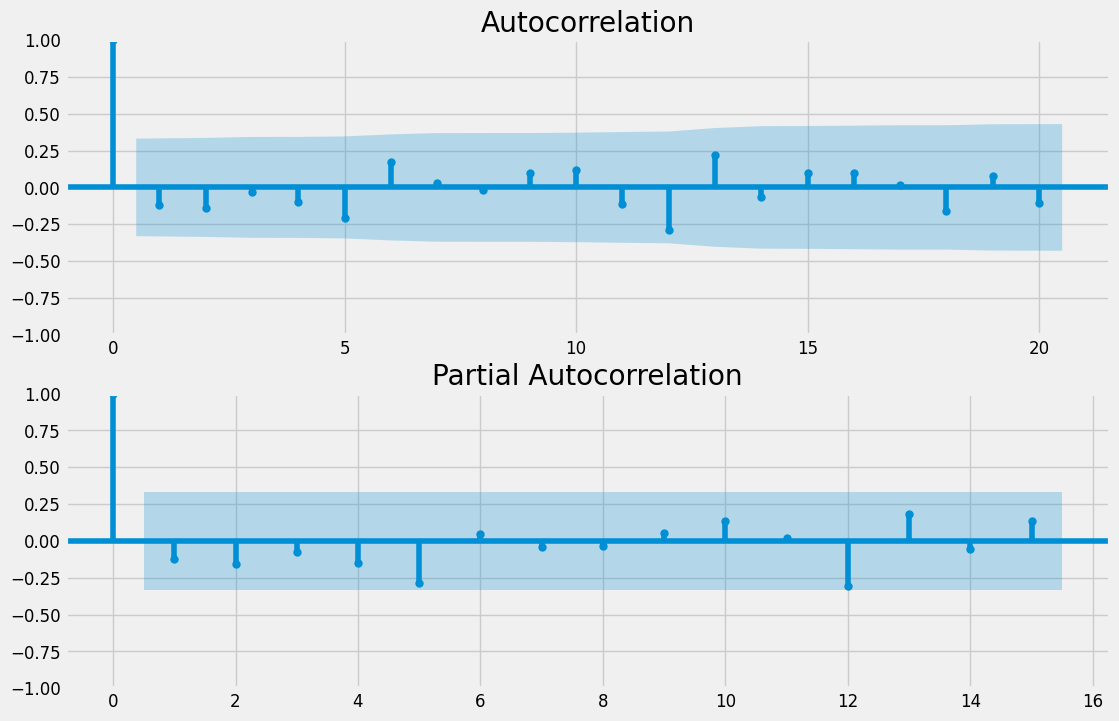

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y_furniture['Seasonal First Difference'].iloc[13:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_furniture['Seasonal First Difference'].iloc[13:],lags=15,ax=ax2)

In [35]:
print(y_furniture.shape)

(48, 3)


In [36]:
train = y_furniture.iloc[:-12]
test = y_furniture.iloc[-12:]
print(train.shape, test.shape)

(36, 3) (12, 3)


In [37]:
train.tail()

,Sales,Sales First Difference,Seasonal First Difference
Order Date,,,
2016-08-31,12483.2323,-585.2867,2844.6401
2016-09-30,27262.8809,14779.6486,989.8579
2016-10-31,11872.5770,-15390.3039,-154.0465
2016-11-30,31783.6288,19911.0518,902.7963
2016-12-31,36678.7150,4895.0862,13592.8958


In [38]:
test.head()

,Sales,Sales First Difference,Seasonal First Difference
Order Date,,,
2017-01-31,5964.0320,-30714.6830,-1658.7110
2017-02-28,6866.3374,902.3054,2940.7864
2017-03-31,10893.4448,4027.1074,-1907.6472
2017-04-30,9065.9581,-1827.4867,-4146.1319
2017-05-31,16957.5582,7891.6001,1837.7232


In [39]:
model=sm.tsa.statespace.SARIMAX(train ['Sales'],order=(1, 0, 1),seasonal_order=(5,1,0,12))
results=model.fit()

In [40]:
start = len(train)
end = len(train) + len(test) - 1
pred = results.predict(start,end,dynamic=True)

pred.index = y_furniture.index[start:end+1]
print(pred)

Order Date
2017-01-31     9954.504660
2017-02-28     4972.233047
2017-03-31    13415.398235
2017-04-30    14117.852871
2017-05-31    15587.185204
2017-06-30    12432.734948
2017-07-31    14361.188642
2017-08-31    13213.231816
2017-09-30    28252.360191
2017-10-31    12574.402353
2017-11-30    33702.419215
2017-12-31    34527.483695
Freq: ME, Name: predicted_mean, dtype: float64


<Axes: xlabel='Order Date'>

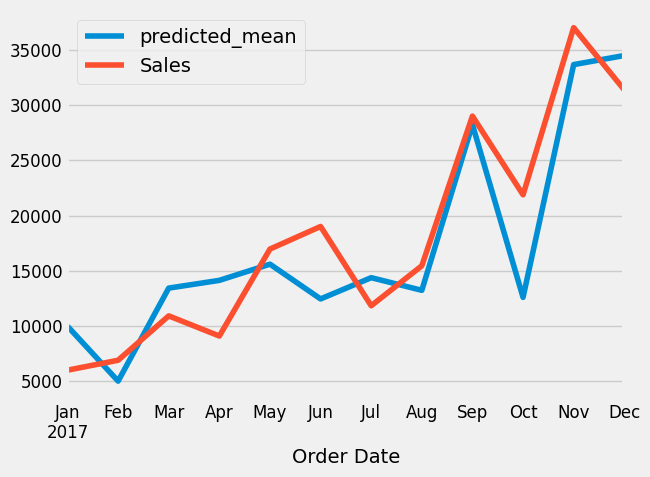

In [41]:
pred.plot(legend = True)
test['Sales'].plot(legend = True)

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['Sales']))
print(rmse)

4244.906373400954


In [43]:
test['Sales'].mean()

17948.9391

In [44]:
ratio = rmse/test['Sales'].mean()
ratio

0.23649901254614844

In [45]:
model=sm.tsa.statespace.SARIMAX(y_furniture ['Sales'],order=(1, 0, 1),seasonal_order=(5,1,0,12))
results=model.fit()

<Axes: xlabel='Order Date'>

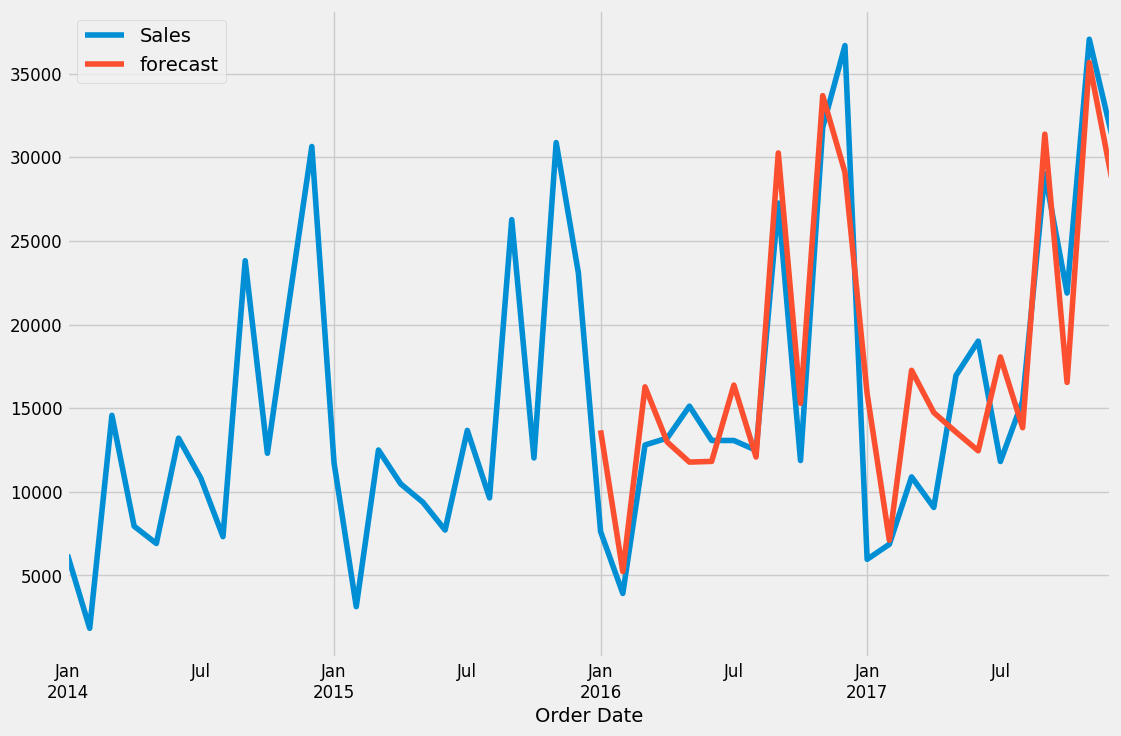

In [46]:
y_furniture['forecast']=results.predict(start=24,end=48,dynamic=True)
y_furniture[['Sales','forecast']].plot(figsize=(12,8))

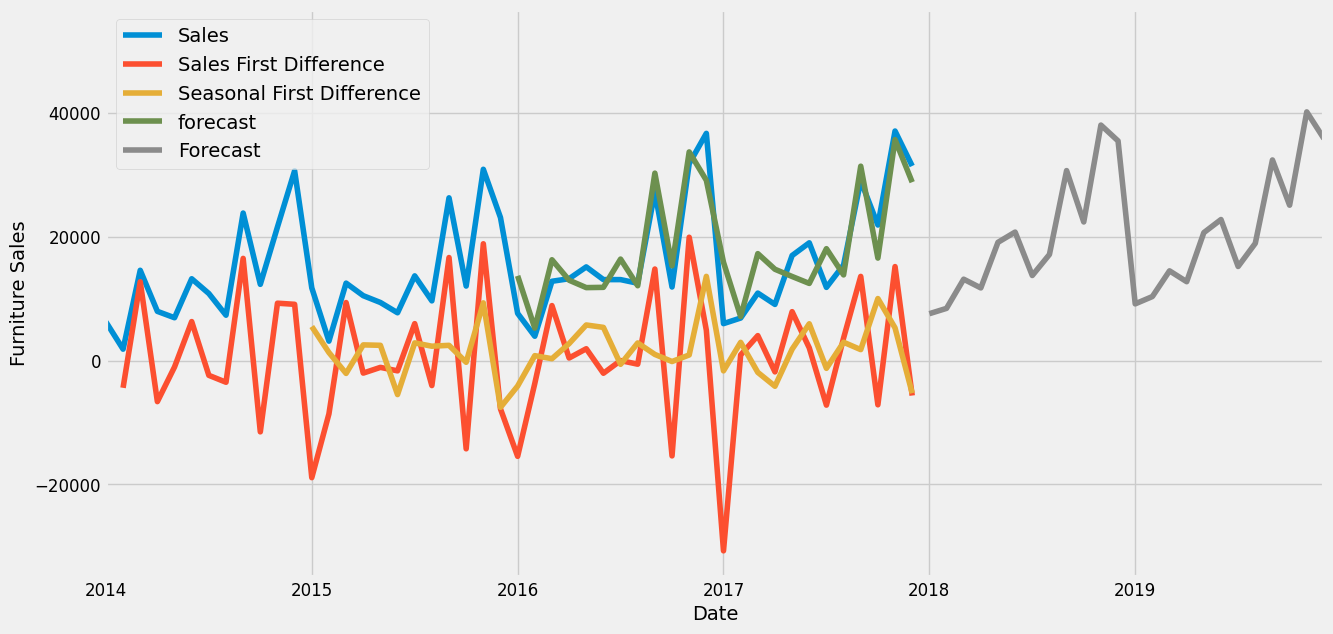

2018-01-31     7566.640030
2018-02-28     8425.688287
2018-03-31    13136.037890
2018-04-30    11726.016686
2018-05-31    19087.430629
2018-06-30    20743.729570
2018-07-31    13731.270936
2018-08-31    17129.587720
2018-09-30    30670.175849
2018-10-31    22376.464972
2018-11-30    38019.322081
2018-12-31    35461.478922
2019-01-31     9153.470874
2019-02-28    10333.040027
2019-03-31    14484.509322
2019-04-30    12733.774483
2019-05-31    20655.086336
2019-06-30    22767.726963
2019-07-31    15187.933887
2019-08-31    18927.934497
2019-09-30    32385.312514
2019-10-31    25081.363371
2019-11-30    40147.120679
2019-12-31    35827.965053
Freq: ME, Name: predicted_mean, dtype: float64


In [47]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()

ax = y_furniture.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='yellow',alpha = 0)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()
print(pred_uc.predicted_mean)

In [48]:
off = df.loc[df['Category'] == 'Office Supplies']

In [49]:
off.shape

(6026, 21)

In [50]:
off['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [51]:
off['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [52]:
off.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,3,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,4,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,5,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [53]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
off.drop(cols, axis=1, inplace=True)
off = off.sort_values('Order Date')

In [54]:
off.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [55]:
off.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,11.784
2,2014-01-04,272.736
3,2014-01-04,3.540
4,2014-01-05,19.536


In [56]:
off = off.groupby('Order Date')['Sales'].sum().reset_index()

In [57]:
off.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [58]:
off.shape

(1148, 2)

In [59]:
off = off.set_index('Order Date')
off.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [60]:
off.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [61]:
y_off = off['Sales'].resample('M').sum()

In [62]:
y_off.head()

Order Date
2014-01-31     4851.080
2014-02-28     1071.724
2014-03-31     8605.879
2014-04-30    11155.074
2014-05-31     7135.624
Freq: ME, Name: Sales, dtype: float64

In [63]:
off = pd.DataFrame({'Order Date':y_off.index, 'Sales':y_off.values})

In [64]:
off

,Order Date,Sales
0,2014-01-31,4851.080
1,2014-02-28,1071.724
2,2014-03-31,8605.879
3,2014-04-30,11155.074
4,2014-05-31,7135.624
5,2014-06-30,12953.037
6,2014-07-31,15121.208
7,2014-08-31,11379.462
8,2014-09-30,27423.298
9,2014-10-31,7211.128


In [65]:
off = off.set_index('Order Date')
off.index

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Order Date', freq=None)

In [66]:
off

,Sales
Order Date,
2014-01-31,4851.080
2014-02-28,1071.724
2014-03-31,8605.879
2014-04-30,11155.074
2014-05-31,7135.624
2014-06-30,12953.037
2014-07-31,15121.208
2014-08-31,11379.462
2014-09-30,27423.298


In [67]:
off.shape

(48, 1)

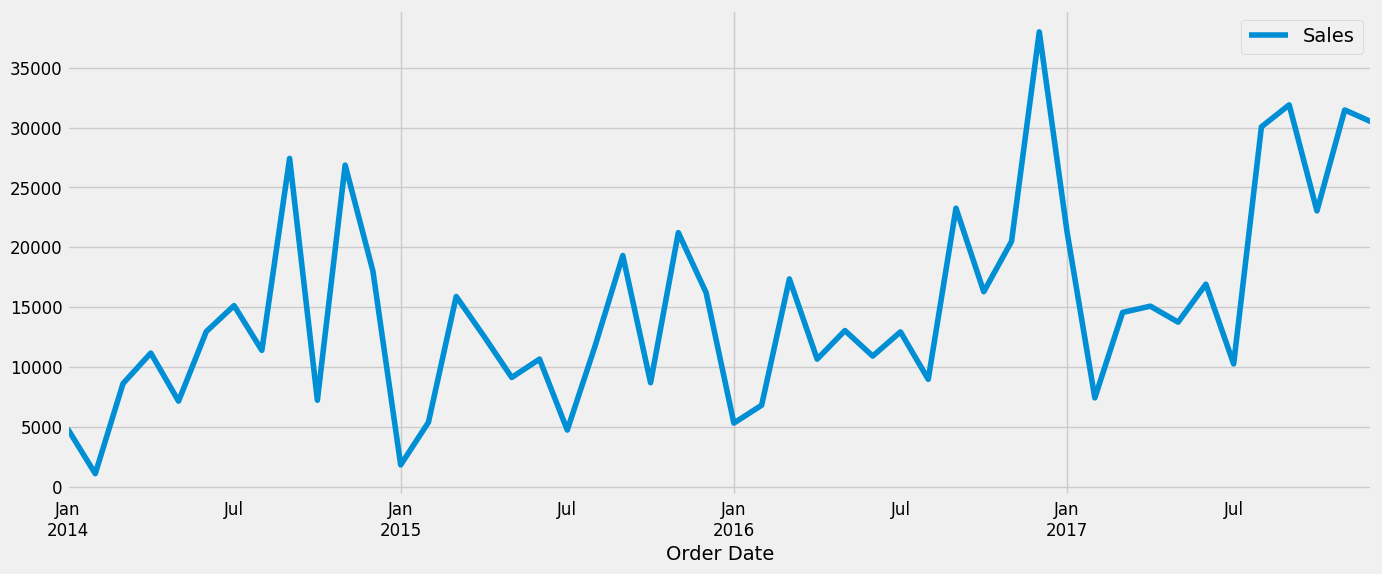

In [68]:
off.plot(figsize=(15, 6))
plt.show()

In [69]:
test_result=adfuller(off['Sales'])

In [70]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [71]:

adfuller_test(off['Sales'])

ADF Test Statistic : -1.9054805932813965
p-value : 0.32948727549472834
#Lags Used : 2
Number of Observations Used : 45
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [72]:
off['Sales First Difference'] = off['Sales'] - off['Sales'].shift(1)

In [73]:
off['Sales'].shift(1)

Order Date
2014-01-31          NaN
2014-02-28     4851.080
2014-03-31     1071.724
2014-04-30     8605.879
2014-05-31    11155.074
2014-06-30     7135.624
2014-07-31    12953.037
2014-08-31    15121.208
2014-09-30    11379.462
2014-10-31    27423.298
2014-11-30     7211.128
2014-12-31    26862.436
2015-01-31    18006.462
2015-02-28     1808.780
2015-03-31     5368.067
2015-04-30    15882.547
2015-05-31    12558.558
2015-06-30     9113.736
2015-07-31    10647.747
2015-08-31     4719.939
2015-09-30    11735.108
2015-10-31    19305.767
2015-11-30     8673.410
2015-12-31    21218.130
2016-01-31    16201.674
2016-02-29     5299.682
2016-03-31     6794.350
2016-04-30    17346.931
2016-05-31    10647.447
2016-06-30    13035.202
2016-07-31    10901.810
2016-08-31    12924.444
2016-09-30     8959.740
2016-10-31    23263.738
2016-11-30    16281.794
2016-12-31    20487.278
2017-01-31    37997.566
2017-02-28    21274.289
2017-03-31     7407.772
2017-04-30    14550.286
2017-05-31    15072.191
2017-

In [74]:
off['Seasonal First Difference']=off['Sales']-off['Sales'].shift(12)

In [75]:
off.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Order Date,,,
2014-01-31,4851.080,NaN,NaN
2014-02-28,1071.724,-3779.356,NaN
2014-03-31,8605.879,7534.155,NaN
2014-04-30,11155.074,2549.195,NaN
2014-05-31,7135.624,-4019.450,NaN
2014-06-30,12953.037,5817.413,NaN
2014-07-31,15121.208,2168.171,NaN
2014-08-31,11379.462,-3741.746,NaN
2014-09-30,27423.298,16043.836,NaN


In [76]:
adfuller_test(off['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.8991726092908
p-value : 3.500391655387945e-05
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Order Date'>

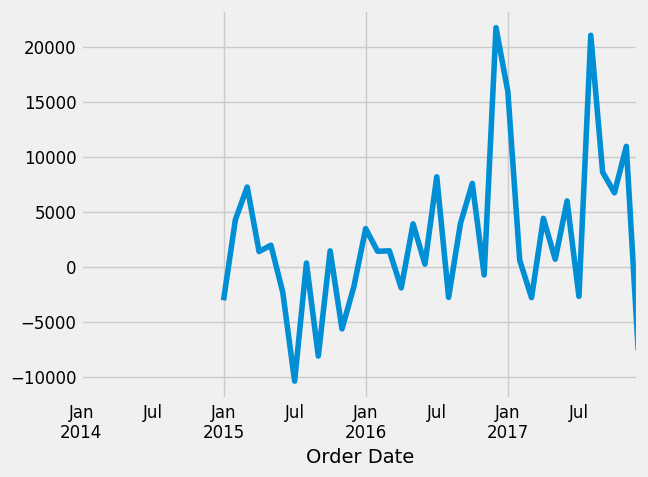

In [77]:
off['Seasonal First Difference'].plot()

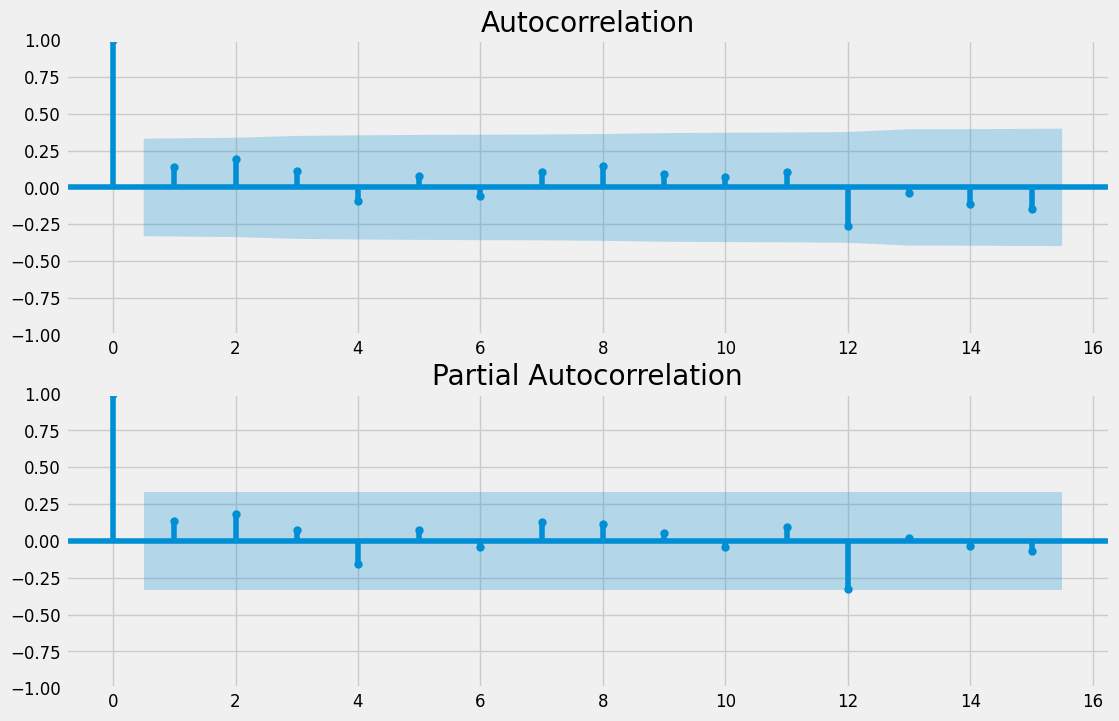

In [78]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(off['Seasonal First Difference'].iloc[13:],lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(off['Seasonal First Difference'].iloc[13:],lags=15,ax=ax2)

In [79]:
print(off.shape)

(48, 3)


In [80]:
train_off = off.iloc[:-12]
test_off = off.iloc[-12:]
print(train_off.shape, test_off.shape)

(36, 3) (12, 3)


In [81]:
train_off.tail()

,Sales,Sales First Difference,Seasonal First Difference
Order Date,,,
2016-08-31,8959.740,-3964.704,-2775.368
2016-09-30,23263.738,14303.998,3957.971
2016-10-31,16281.794,-6981.944,7608.384
2016-11-30,20487.278,4205.484,-730.852
2016-12-31,37997.566,17510.288,21795.892


In [82]:
test_off.head()

,Sales,Sales First Difference,Seasonal First Difference
Order Date,,,
2017-01-31,21274.289,-16723.277,15974.607
2017-02-28,7407.772,-13866.517,613.422
2017-03-31,14550.286,7142.514,-2796.645
2017-04-30,15072.191,521.905,4424.744
2017-05-31,13736.964,-1335.227,701.762


In [83]:
model=sm.tsa.statespace.SARIMAX(train_off ['Sales'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [84]:
start = len(train_off)
end = len(train_off) + len(test_off) - 1
pred = results.predict(start,end,dynamic=True)

pred.index = off.index[start:end+1]
print(pred)

Order Date
2017-01-31     9458.634104
2017-02-28    22516.800251
2017-03-31    25591.510624
2017-04-30    24956.727300
2017-05-31    22188.686560
2017-06-30    23478.036552
2017-07-31    21587.094529
2017-08-31    21902.918950
2017-09-30    33507.787083
2017-10-31    25973.603946
2017-11-30    32254.014249
2017-12-31    43461.412640
Name: predicted_mean, dtype: float64


<Axes: xlabel='Order Date'>

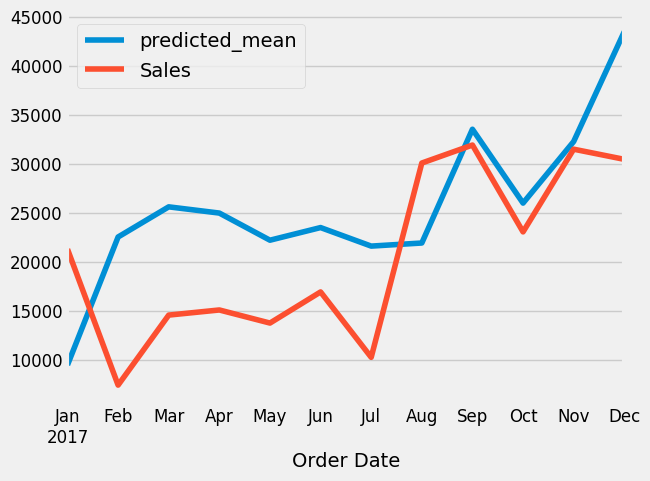

In [85]:
pred.plot(legend = True)
test_off['Sales'].plot(legend = True)

In [86]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_off = sqrt(mean_squared_error(pred,test_off['Sales']))
print(rmse_off)

9481.458239736743


In [87]:
test_off['Sales'].mean()

20508.09791666667

In [88]:
ratio_off = rmse_off/test_off['Sales'].mean()
ratio_off

0.46232752926497794

In [89]:
model=sm.tsa.statespace.SARIMAX(off ['Sales'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Order Date'>

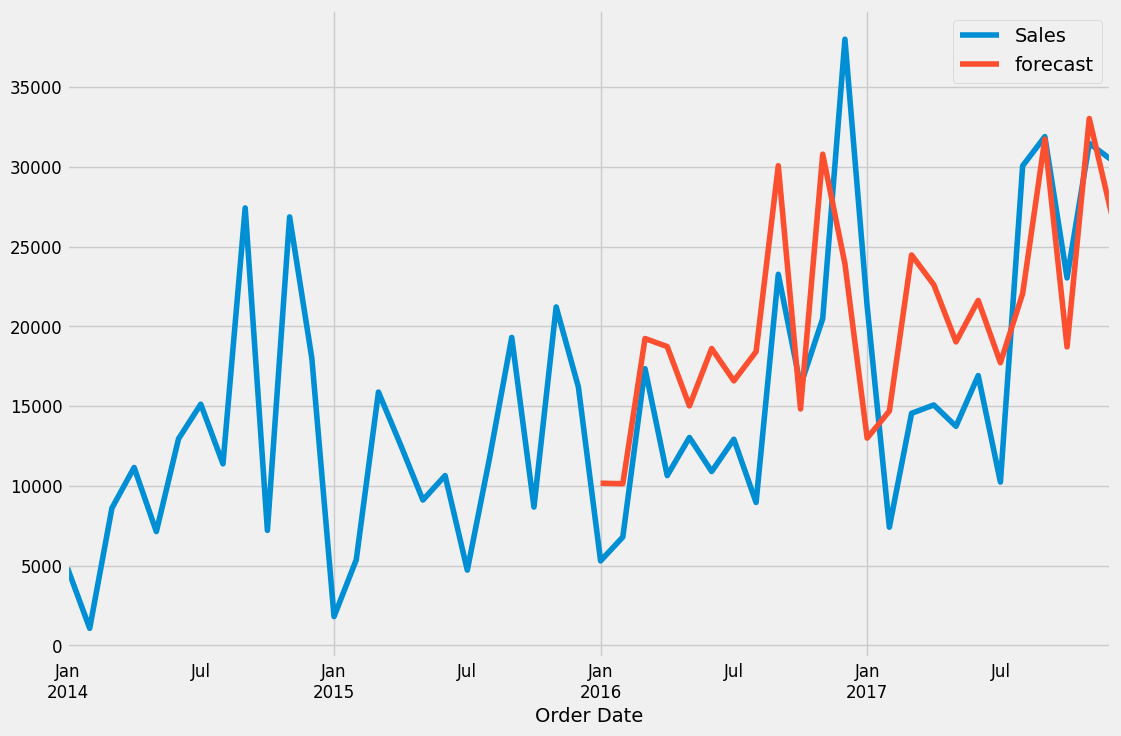

In [90]:
off['forecast']=results.predict(start=24,end=48,dynamic=True)
off[['Sales','forecast']].plot(figsize=(12,8))

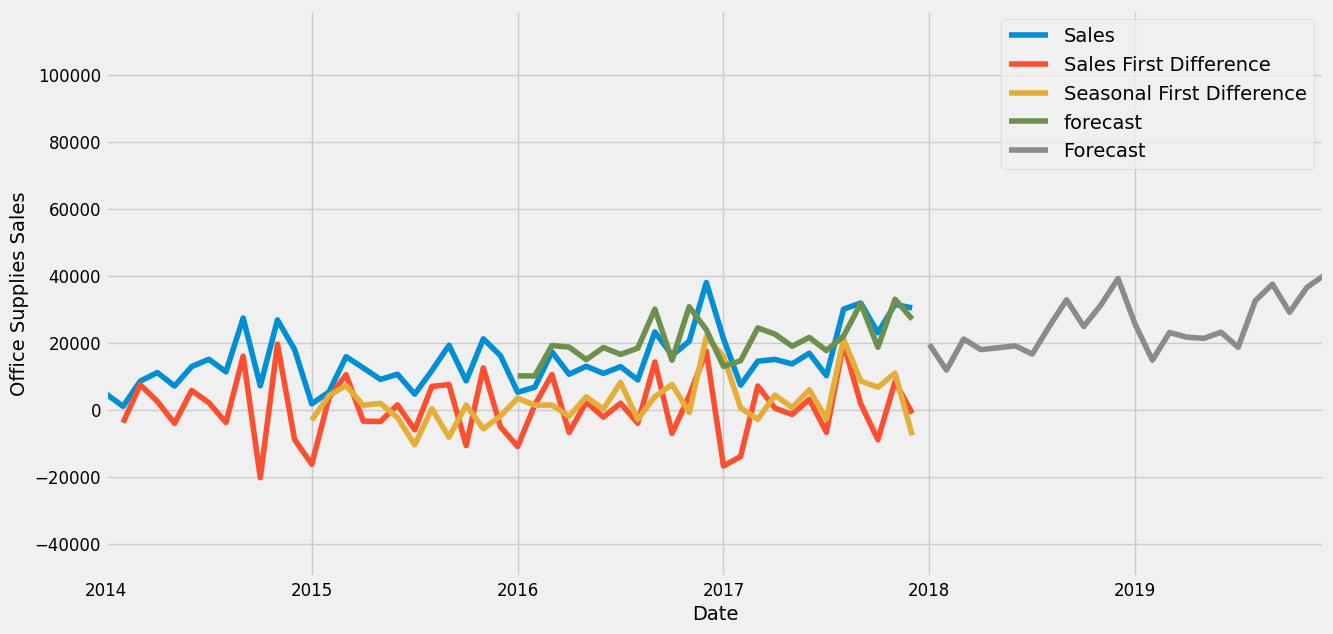

2018-01-31    19567.670115
2018-02-28    11893.462386
2018-03-31    21158.134659
2018-04-30    18010.793390
2018-05-31    18544.613639
2018-06-30    19132.197344
2018-07-31    16661.882085
2018-08-31    25016.782681
2018-09-30    32861.771816
2018-10-31    24906.589121
2018-11-30    31304.157685
2018-12-31    39204.035676
2019-01-31    25514.325185
2019-02-28    14856.618353
2019-03-31    23098.832974
2019-04-30    21719.347278
2019-05-31    21352.653759
2019-06-30    23186.901308
2019-07-31    18692.885175
2019-08-31    32570.940683
2019-09-30    37520.769028
2019-10-31    29130.291456
2019-11-30    36509.573004
2019-12-31    40104.398524
Freq: ME, Name: predicted_mean, dtype: float64


In [91]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()

ax = off.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='yellow',alpha = 0)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')

plt.legend()
plt.show()
print(pred_uc.predicted_mean)

In [92]:
tech = df.loc[df['Category'] == 'Technology']

In [93]:
tech.shape

(1847, 21)

In [94]:
tech['Order Date'].min()


Timestamp('2014-01-06 00:00:00')

In [95]:
tech['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [96]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
tech.drop(cols, axis=1, inplace=True)
tech = tech.sort_values('Order Date')

In [97]:
tech.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [98]:
tech.head()

,Order Date,Sales
10,2014-01-06,391.98
11,2014-01-06,755.96
17,2014-01-09,31.20
23,2014-01-13,646.74
33,2014-01-15,149.95


In [99]:
tech = tech.groupby('Order Date')['Sales'].sum().reset_index()

In [100]:
tech.head()

,Order Date,Sales
0,2014-01-06,1147.94
1,2014-01-09,31.20
2,2014-01-13,646.74
3,2014-01-15,149.95
4,2014-01-16,124.20


In [101]:
tech.shape

(824, 2)

In [102]:
tech = tech.set_index('Order Date')
tech.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [103]:
tech.head()

,Sales
Order Date,
2014-01-06,1147.94
2014-01-09,31.20
2014-01-13,646.74
2014-01-15,149.95
2014-01-16,124.20


In [104]:
y_tech = tech['Sales'].resample('M').sum()

In [105]:
tech = pd.DataFrame({'Order Date':y_tech.index, 'Sales':y_tech.values})

In [106]:
tech.head()

,Order Date,Sales
0,2014-01-31,3143.290
1,2014-02-28,1608.510
2,2014-03-31,32511.174
3,2014-04-30,9195.434
4,2014-05-31,9599.876


In [107]:
tech = tech.set_index('Order Date')
tech.index

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Order Date', freq=None)

In [108]:
tech

,Sales
Order Date,
2014-01-31,3143.290
2014-02-28,1608.510
2014-03-31,32511.174
2014-04-30,9195.434
2014-05-31,9599.876
2014-06-30,8435.965
2014-07-31,8004.134
2014-08-31,9209.660
2014-09-30,30537.572


In [109]:
tech.shape

(48, 1)

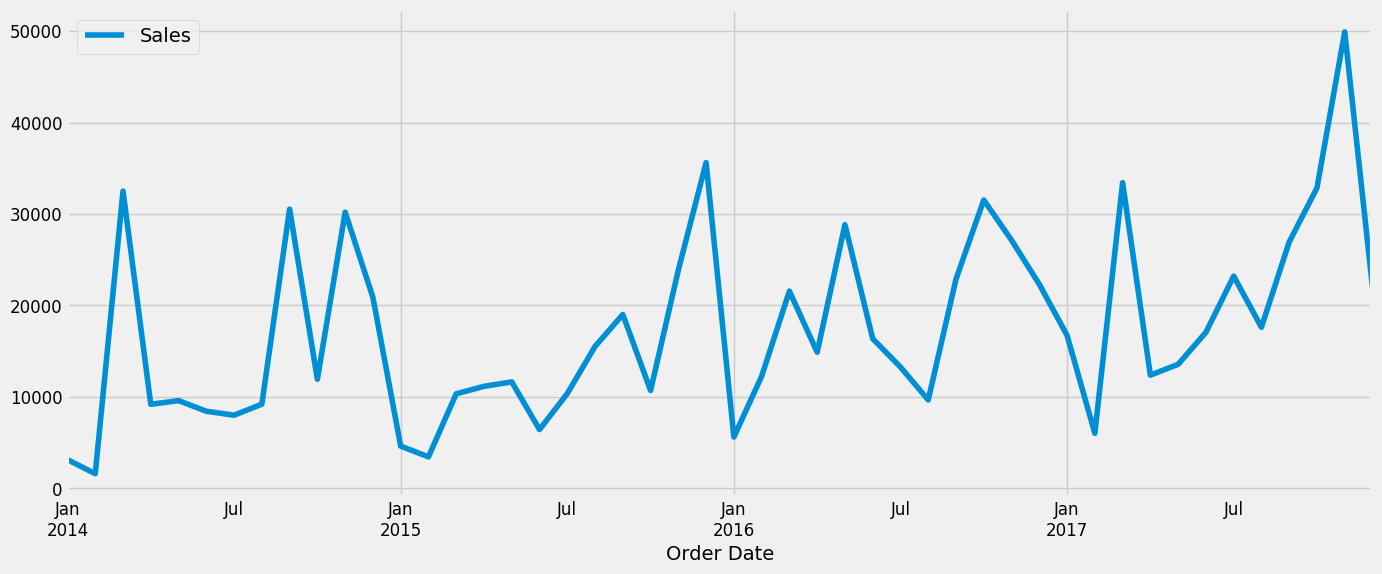

In [110]:
tech.plot(figsize=(15, 6))
plt.show()

In [111]:
test_result=adfuller(tech['Sales'])

In [112]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [113]:
adfuller_test(tech['Sales'])

ADF Test Statistic : -5.522761103726894
p-value : 1.861596730206398e-06
#Lags Used : 0
Number of Observations Used : 47
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


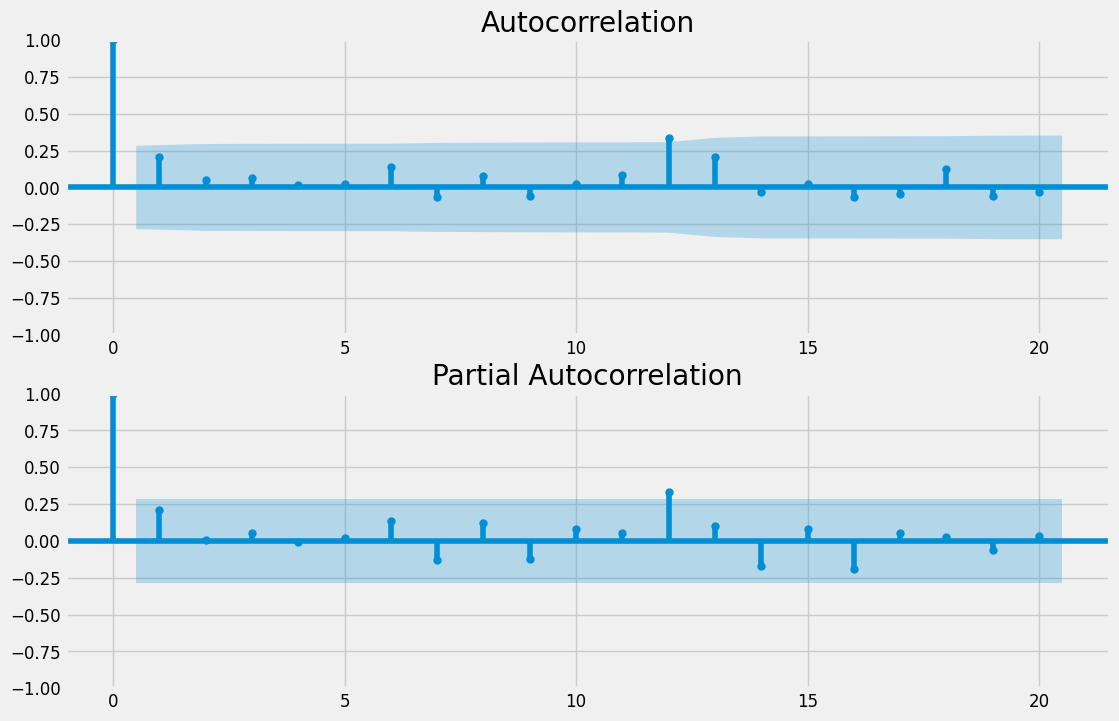

In [114]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tech['Sales'].iloc[0:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tech['Sales'].iloc[0:],lags=20,ax=ax2)

In [115]:
tech['Sales First Difference'] = tech['Sales'] - tech['Sales'].shift(1)


In [116]:
tech['Sales'].shift(1)


Order Date
2014-01-31          NaN
2014-02-28     3143.290
2014-03-31     1608.510
2014-04-30    32511.174
2014-05-31     9195.434
2014-06-30     9599.876
2014-07-31     8435.965
2014-08-31     8004.134
2014-09-30     9209.660
2014-10-31    30537.572
2014-11-30    11938.018
2014-12-31    30201.408
2015-01-31    20893.192
2015-02-28     4625.354
2015-03-31     3448.970
2015-04-30    10343.922
2015-05-31    11160.952
2015-06-30    11643.000
2015-07-31     6435.366
2015-08-31    10370.966
2015-09-30    15524.632
2015-10-31    19017.128
2015-11-30    10704.890
2015-12-31    23873.601
2016-01-31    35632.028
2016-02-29     5620.066
2016-03-31    12258.914
2016-04-30    21567.852
2016-05-31    14890.502
2016-06-30    28832.691
2016-07-31    16372.152
2016-08-31    13269.000
2016-09-30     9672.402
2016-10-31    22883.406
2016-11-30    31533.374
2016-12-31    27141.059
2017-01-31    22322.762
2017-02-28    16733.053
2017-03-31     6027.024
2017-04-30    33428.622
2017-05-31    12383.387
2017-

In [117]:
tech['Seasonal First Difference']=tech['Sales']-tech['Sales'].shift(12)


In [118]:
tech.head(14)


,Sales,Sales First Difference,Seasonal First Difference
Order Date,,,
2014-01-31,3143.290,NaN,NaN
2014-02-28,1608.510,-1534.780,NaN
2014-03-31,32511.174,30902.664,NaN
2014-04-30,9195.434,-23315.740,NaN
2014-05-31,9599.876,404.442,NaN
2014-06-30,8435.965,-1163.911,NaN
2014-07-31,8004.134,-431.831,NaN
2014-08-31,9209.660,1205.526,NaN
2014-09-30,30537.572,21327.912,NaN


In [119]:
adfuller_test(tech['Seasonal First Difference'].dropna())


ADF Test Statistic : -5.97816636578823
p-value : 1.8658565544152193e-07
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Order Date'>

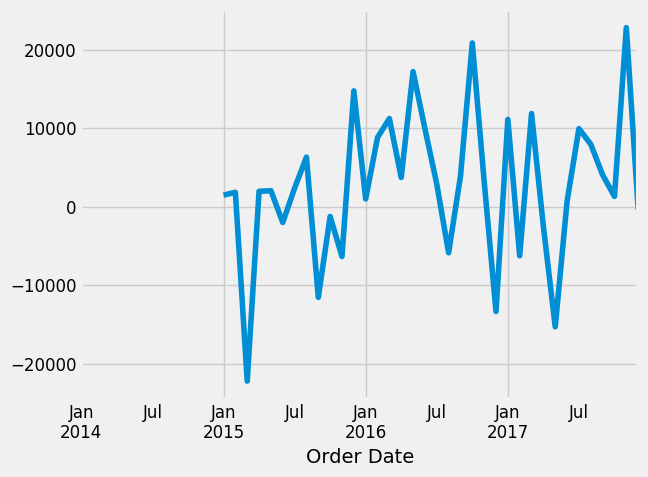

In [120]:
tech['Seasonal First Difference'].plot()


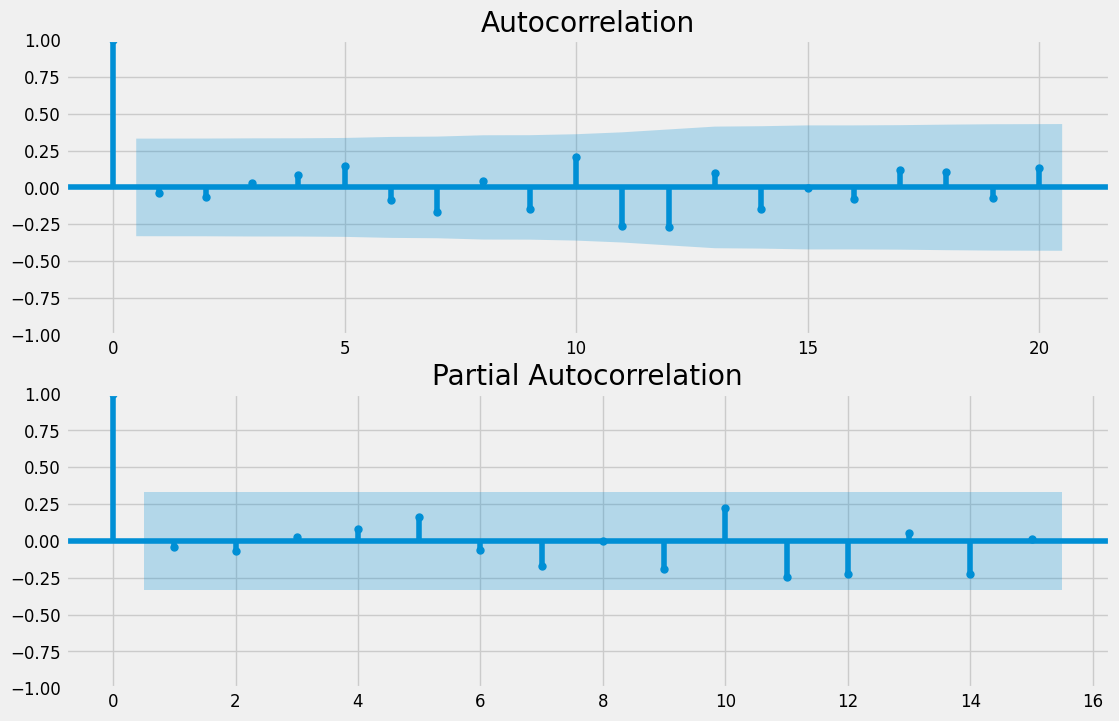

In [121]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tech['Seasonal First Difference'].iloc[13:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tech['Seasonal First Difference'].iloc[13:],lags=15,ax=ax2)

In [122]:
print(tech.shape)

(48, 3)


In [123]:
train_tech = tech.iloc[:-12]
test_tech = tech.iloc[-12:]
print(train_tech.shape, test_tech.shape)

(36, 3) (12, 3)


In [124]:
train_tech.tail()

,Sales,Sales First Difference,Seasonal First Difference
Order Date,,,
2016-08-31,9672.402,-3596.598,-5852.230
2016-09-30,22883.406,13211.004,3866.278
2016-10-31,31533.374,8649.968,20828.484
2016-11-30,27141.059,-4392.315,3267.458
2016-12-31,22322.762,-4818.297,-13309.266


In [125]:
test_tech.head()

,Sales,Sales First Difference,Seasonal First Difference
Order Date,,,
2017-01-31,16733.053,-5589.709,11112.987
2017-02-28,6027.024,-10706.029,-6231.890
2017-03-31,33428.622,27401.598,11860.770
2017-04-30,12383.387,-21045.235,-2507.115
2017-05-31,13566.588,1183.201,-15266.103


In [126]:
model=sm.tsa.statespace.SARIMAX(train_tech ['Sales'],order=(1,0,1),seasonal_order=(10,1,0,12))
results=model.fit()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [127]:
start = len(train_tech)
end = len(train_tech) + len(test_tech) - 1
pred = results.predict(start,end,dynamic=True)

pred.index = tech.index[start:end+1]
print(pred)

Order Date
2017-01-31     7506.314255
2017-02-28     9499.204197
2017-03-31    20906.846360
2017-04-30    14579.598921
2017-05-31    27499.011663
2017-06-30    14113.243227
2017-07-31    14813.075134
2017-08-31    12621.379292
2017-09-30    24800.064303
2017-10-31    27717.549377
2017-11-30    29881.128568
2017-12-31    30161.354383
Name: predicted_mean, dtype: float64


<Axes: xlabel='Order Date'>

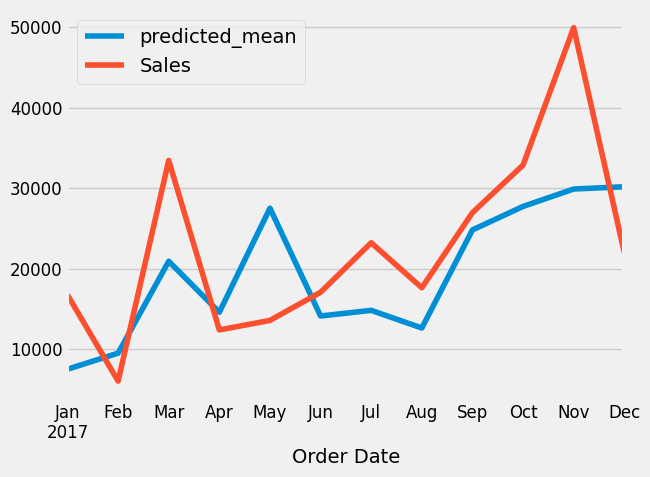

In [128]:
pred.plot(legend = True)
test_tech['Sales'].plot(legend = True)

In [129]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_tech = sqrt(mean_squared_error(pred,test_tech['Sales']))
print(rmse_tech)

9382.813637655721


In [130]:
test_tech['Sales'].mean()

22644.234249999998

In [131]:
ratio_tech = rmse_tech/test_tech['Sales'].mean()
ratio_tech

0.4143577360164309

In [132]:
model=sm.tsa.statespace.SARIMAX(tech ['Sales'],order=(1, 0, 1),seasonal_order=(10,1,0,12))
results=model.fit()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Order Date'>

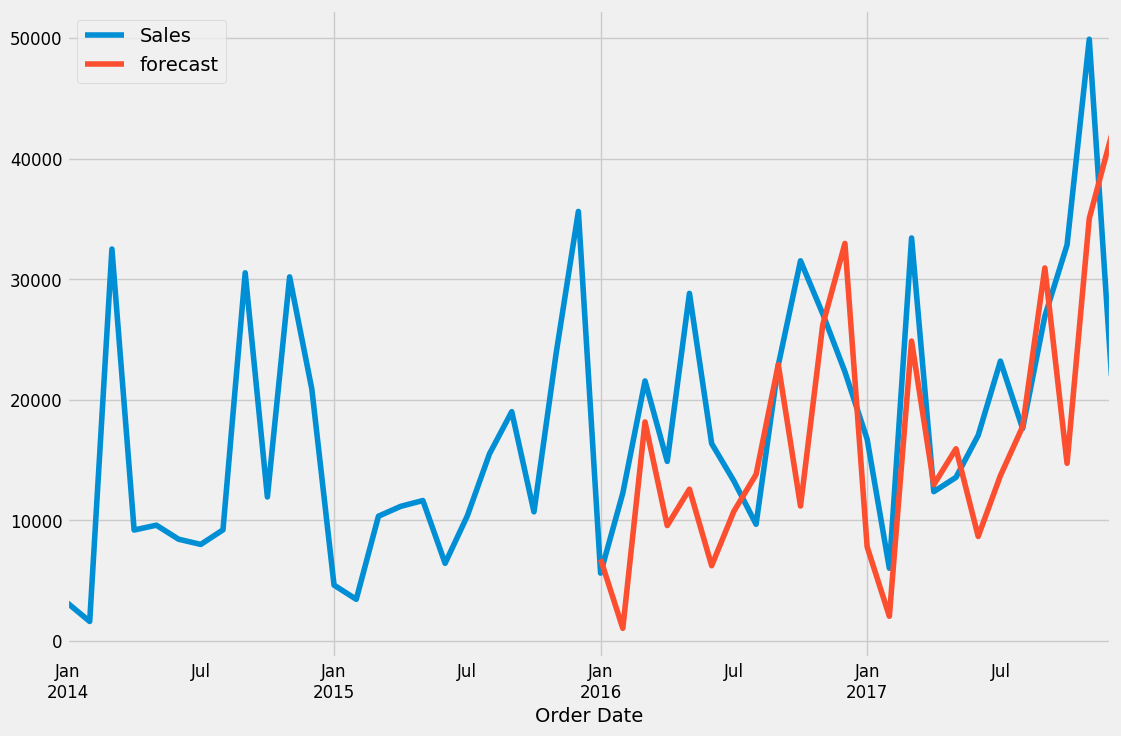

In [133]:
tech['forecast']=results.predict(start=24,end=48,dynamic=True)
tech[['Sales','forecast']].plot(figsize=(12,8))

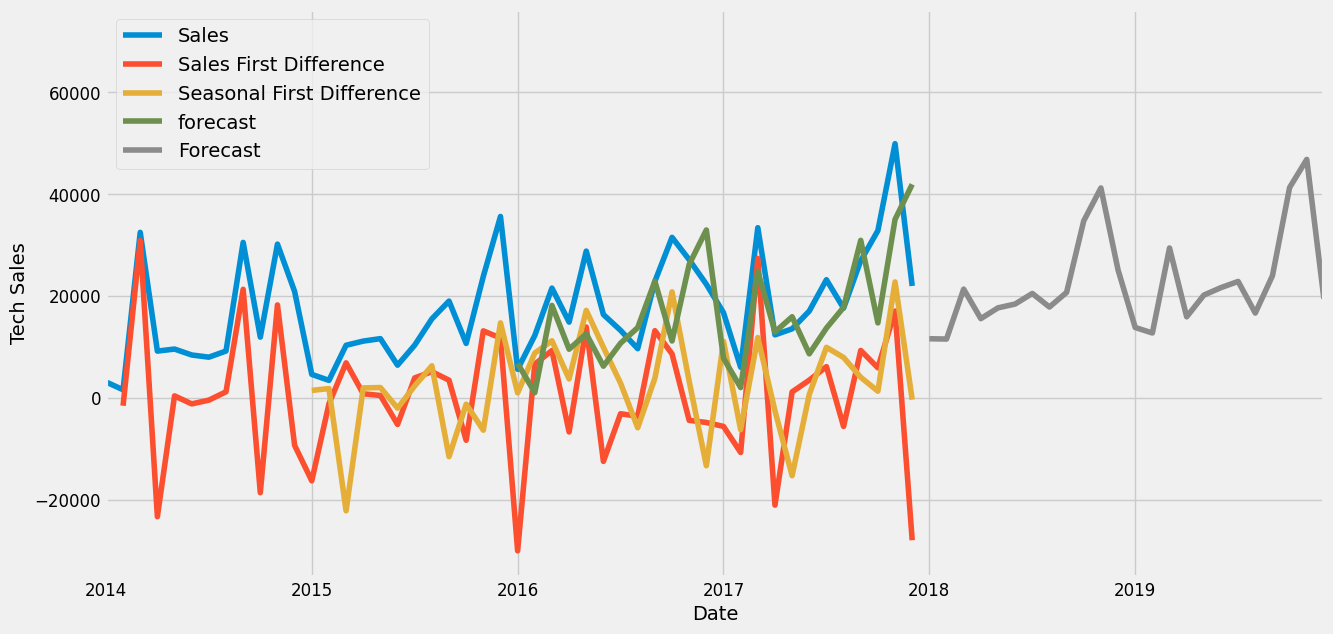

2018-01-31    11623.594639
2018-02-28    11561.890487
2018-03-31    21367.429756
2018-04-30    15570.244698
2018-05-31    17690.079008
2018-06-30    18438.330345
2018-07-31    20512.224831
2018-08-31    17854.445265
2018-09-30    20721.942583
2018-10-31    34769.126061
2018-11-30    41224.221354
2018-12-31    25131.014254
2019-01-31    13832.830079
2019-02-28    12755.104653
2019-03-31    29442.531037
2019-04-30    15927.076287
2019-05-31    20190.075807
2019-06-30    21659.363287
2019-07-31    22871.643816
2019-08-31    16668.230482
2019-09-30    23999.930411
2019-10-31    41311.368093
2019-11-30    46830.598633
2019-12-31    19461.800502
Freq: ME, Name: predicted_mean, dtype: float64


In [134]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()

ax = tech.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='yellow',alpha = 0)
ax.set_xlabel('Date')
ax.set_ylabel('Tech Sales')

plt.legend()
plt.show()
print(pred_uc.predicted_mean)

In [135]:
pr = pd.read_excel("soc.xlsx")

In [136]:
cols_p = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount','Sales']
pr.drop(cols_p, axis=1, inplace=True)
pr = pr.sort_values('Order Date')

In [137]:
pr.isnull().sum()

Order Date    0
Profit        0
dtype: int64

In [138]:
pr.head()

,Order Date,Profit
0,2014-01-03,5.5512
1,2014-01-04,4.2717
2,2014-01-04,-64.7748
3,2014-01-04,-5.4870
4,2014-01-05,4.8840


In [139]:
pr = pr.groupby('Order Date')['Profit'].sum().reset_index()


In [140]:
pr.head()

,Order Date,Profit
0,2014-01-03,5.5512
1,2014-01-04,-65.9901
2,2014-01-05,4.8840
3,2014-01-06,1358.0524
4,2014-01-07,-71.9621


In [141]:
pr.shape

(1237, 2)

In [142]:
pr = pr.set_index('Order Date')
pr.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1237, freq=None)

In [143]:
pr.head()

,Profit
Order Date,
2014-01-03,5.5512
2014-01-04,-65.9901
2014-01-05,4.8840
2014-01-06,1358.0524
2014-01-07,-71.9621


In [144]:
y_pr = pr['Profit'].resample('M').sum()


In [145]:
pr = pd.DataFrame({'Order Date':y_pr.index, 'Profit':y_pr.values})


In [146]:
pr.head()

,Order Date,Profit
0,2014-01-31,2450.1907
1,2014-02-28,862.3084
2,2014-03-31,498.7299
3,2014-04-30,3488.8352
4,2014-05-31,2738.7096


In [147]:
pr = pr.set_index('Order Date')
pr.index

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Order Date', freq=None)

In [148]:
pr

,Profit
Order Date,
2014-01-31,2450.1907
2014-02-28,862.3084
2014-03-31,498.7299
2014-04-30,3488.8352
2014-05-31,2738.7096
2014-06-30,4976.5244
2014-07-31,-841.4826
2014-08-31,5318.1050
2014-09-30,8328.0994


In [149]:
pr.shape

(48, 1)

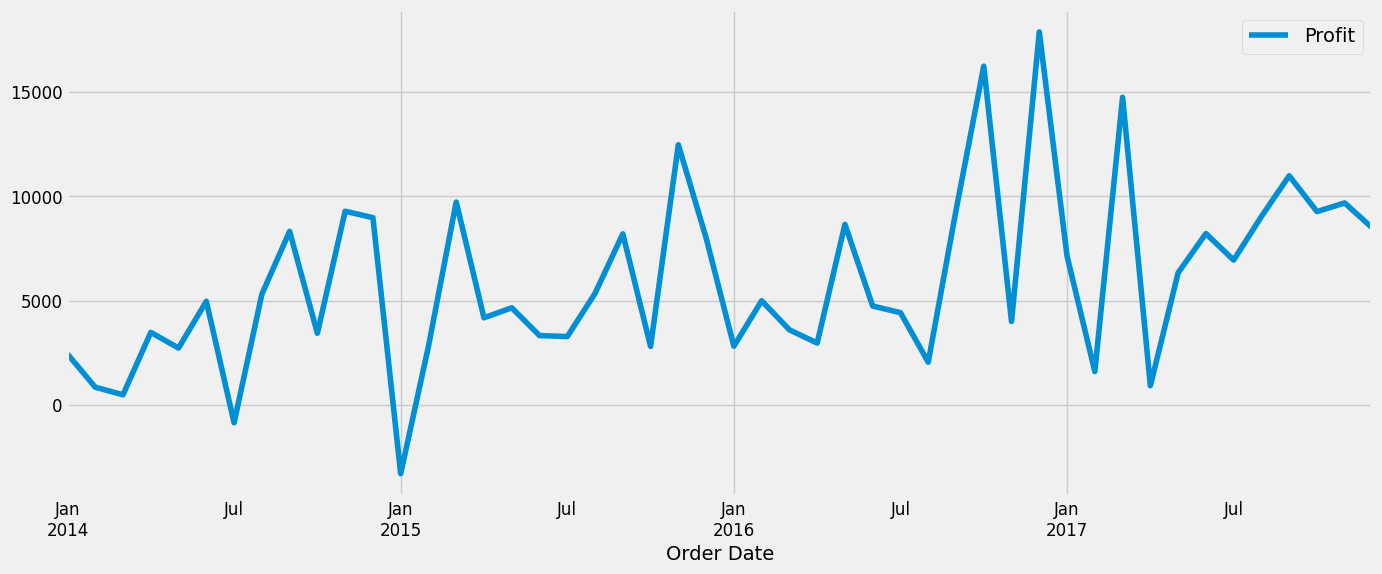

In [150]:
pr.plot(figsize=(15, 6))
plt.show()

In [151]:
test_result=adfuller(pr['Profit'])

In [152]:
def adfuller_test(profit):
    result=adfuller(profit)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [153]:
adfuller_test(pr['Profit'])

ADF Test Statistic : -2.828474788682237
p-value : 0.05432005483966988
#Lags Used : 3
Number of Observations Used : 44
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [154]:
pr['Profit First Difference'] = pr['Profit'] - pr['Profit'].shift(1)


In [155]:
pr['Profit'].shift(1)

Order Date
2014-01-31           NaN
2014-02-28     2450.1907
2014-03-31      862.3084
2014-04-30      498.7299
2014-05-31     3488.8352
2014-06-30     2738.7096
2014-07-31     4976.5244
2014-08-31     -841.4826
2014-09-30     5318.1050
2014-10-31     8328.0994
2014-11-30     3448.2573
2014-12-31     9292.1269
2015-01-31     8983.5699
2015-02-28    -3281.0070
2015-03-31     2813.8508
2015-04-30     9732.0978
2015-05-31     4187.4962
2015-06-30     4667.8690
2015-07-31     3335.5572
2015-08-31     3288.6483
2015-09-30     5355.8084
2015-10-31     8209.1627
2015-11-30     2817.3660
2015-12-31    12474.7884
2016-01-31     8016.9659
2016-02-29     2824.8233
2016-03-31     5004.5795
2016-04-30     3611.9680
2016-05-31     2977.8149
2016-06-30     8662.1464
2016-07-31     4750.3781
2016-08-31     4432.8779
2016-09-30     2062.0693
2016-10-31     9328.6576
2016-11-30    16243.1425
2016-12-31     4011.4075
2017-01-31    17885.3093
2017-02-28     7140.4391
2017-03-31     1613.8720
2017-04-30    

In [156]:
pr['Seasonal First Difference']=pr['Profit']-pr['Profit'].shift(12)

In [157]:
pr.head(14)

,Profit,Profit First Difference,Seasonal First Difference
Order Date,,,
2014-01-31,2450.1907,NaN,NaN
2014-02-28,862.3084,-1587.8823,NaN
2014-03-31,498.7299,-363.5785,NaN
2014-04-30,3488.8352,2990.1053,NaN
2014-05-31,2738.7096,-750.1256,NaN
2014-06-30,4976.5244,2237.8148,NaN
2014-07-31,-841.4826,-5818.0070,NaN
2014-08-31,5318.1050,6159.5876,NaN
2014-09-30,8328.0994,3009.9944,NaN


In [158]:
adfuller_test(pr['Seasonal First Difference'].dropna())

ADF Test Statistic : -8.662415487599098
p-value : 4.7828274283899887e-14
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Order Date'>

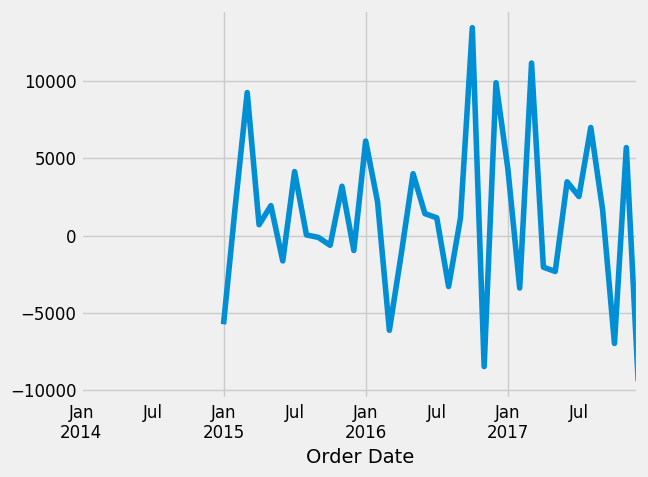

In [159]:
pr['Seasonal First Difference'].plot()

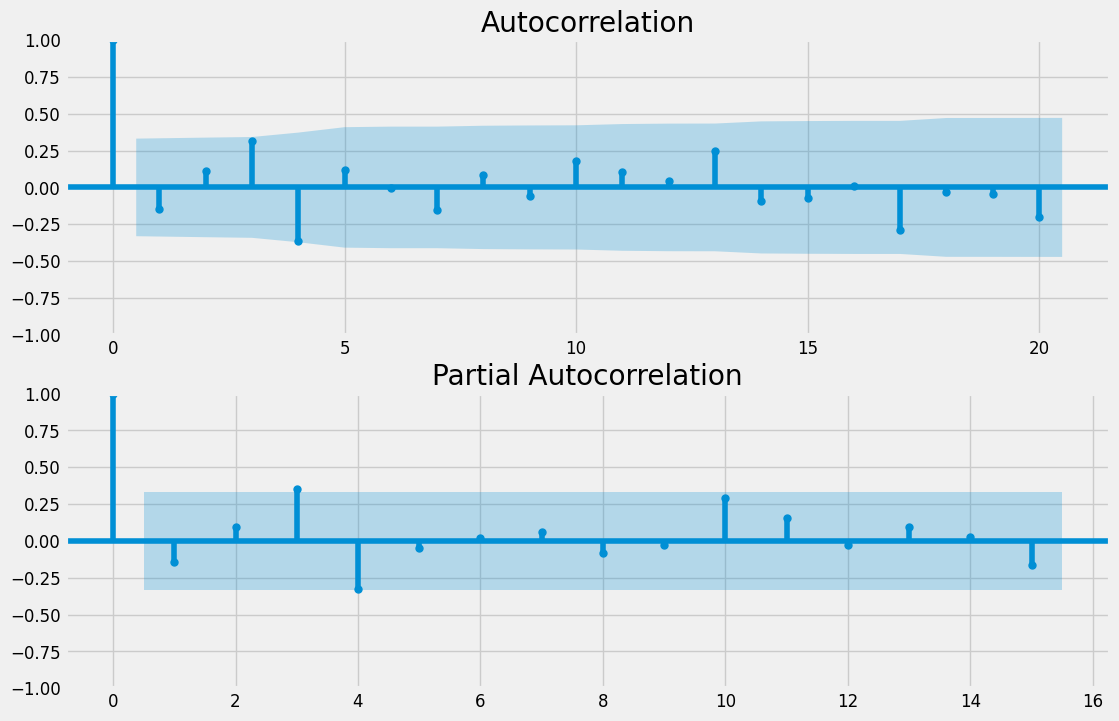

In [160]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(pr['Profit'].iloc[13:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(pr['Profit'].iloc[13:],lags=15,ax=ax2)

In [161]:
train_pr = pr.iloc[:-12]
test_pr = pr.iloc[-12:]
print(train_pr.shape, test_pr.shape)

(36, 3) (12, 3)


In [162]:
train_pr.tail()

,Profit,Profit First Difference,Seasonal First Difference
Order Date,,,
2016-08-31,2062.0693,-2370.8086,-3293.7391
2016-09-30,9328.6576,7266.5883,1119.4949
2016-10-31,16243.1425,6914.4849,13425.7765
2016-11-30,4011.4075,-12231.7350,-8463.3809
2016-12-31,17885.3093,13873.9018,9868.3434


In [163]:
test_pr.head()

,Profit,Profit First Difference,Seasonal First Difference
Order Date,,,
2017-01-31,7140.4391,-10744.8702,4315.6158
2017-02-28,1613.8720,-5526.5671,-3390.7075
2017-03-31,14751.8915,13138.0195,11139.9235
2017-04-30,933.2900,-13818.6015,-2044.5249
2017-05-31,6342.5828,5409.2928,-2319.5636


In [164]:
model=sm.tsa.statespace.SARIMAX(train_pr ['Profit'],order=(4, 1, 3),seasonal_order=(4,1,3,12))
results=model.fit()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [165]:
start = len(train_pr)
end = len(train_pr) + len(test_pr) - 1
pred = results.predict(start,end,dynamic=True)

pred.index = pr.index[start:end+1]
print(pred)

Order Date
2017-01-31    -1216.563337
2017-02-28     9313.048236
2017-03-31    10598.623032
2017-04-30     6540.282482
2017-05-31     8132.864258
2017-06-30     7106.758038
2017-07-31     8131.234104
2017-08-31     8453.727455
2017-09-30    11502.212448
2017-10-31    11062.822046
2017-11-30    11690.157288
2017-12-31    18059.093795
Name: predicted_mean, dtype: float64


<Axes: xlabel='Order Date'>

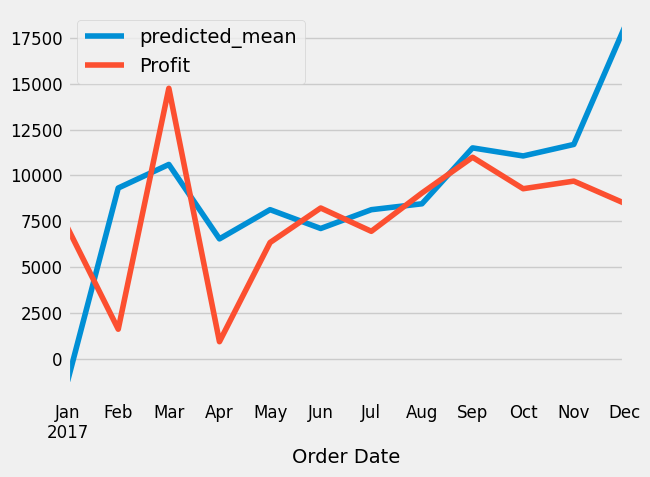

In [166]:
pred.plot(legend = True)
test_pr['Profit'].plot(legend = True)

In [167]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test_pr['Profit']))
print(rmse)

4857.484472484347


In [168]:
test_pr['Profit'].mean()

7786.6058

In [169]:
ratio = rmse/test_pr['Profit'].mean()
ratio

0.623825656165148

<Axes: xlabel='Order Date'>

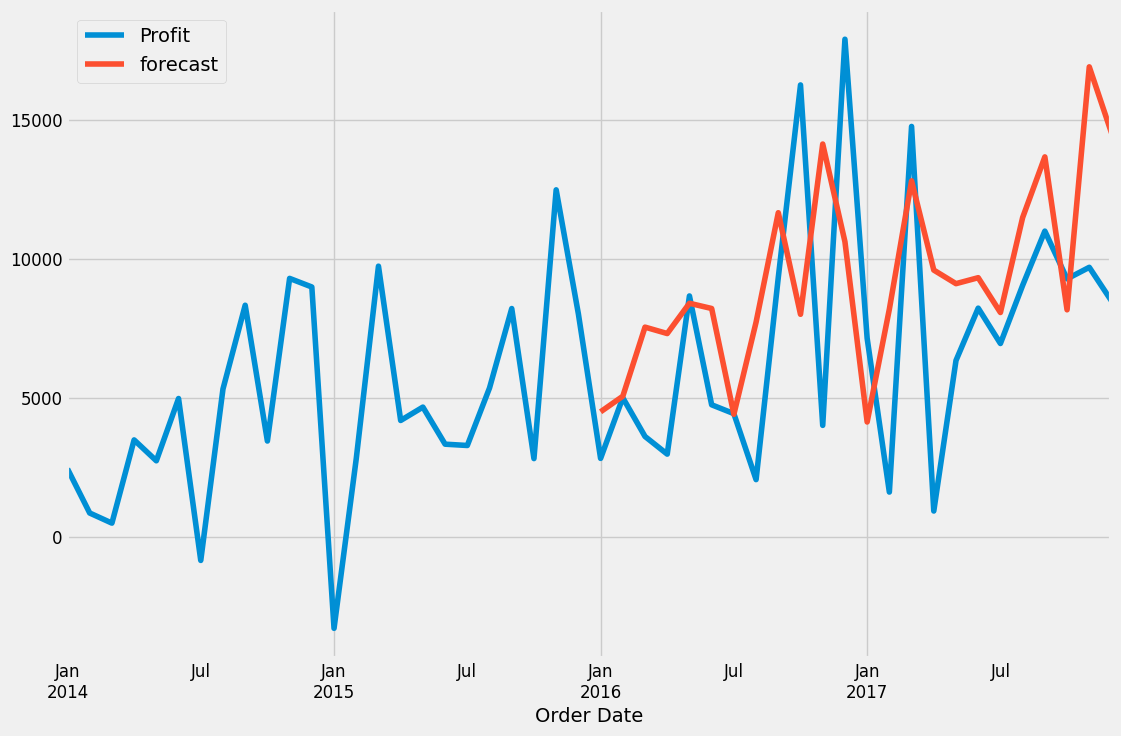

In [170]:
pr['forecast']=results.predict(start=24,end=48,dynamic=True)
pr[['Profit','forecast']].plot(figsize=(12,8))

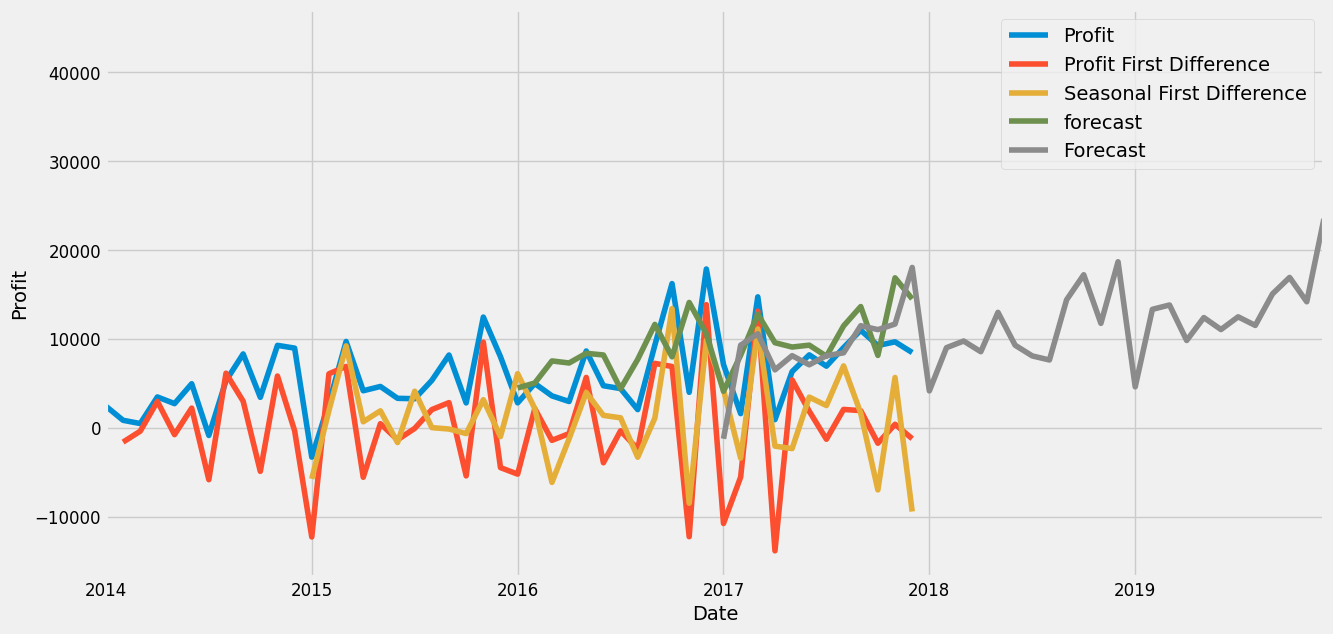

2017-01-31    -1216.563337
2017-02-28     9313.048236
2017-03-31    10598.623032
2017-04-30     6540.282482
2017-05-31     8132.864258
2017-06-30     7106.758038
2017-07-31     8131.234104
2017-08-31     8453.727455
2017-09-30    11502.212448
2017-10-31    11062.822046
2017-11-30    11690.157288
2017-12-31    18059.093795
2018-01-31     4172.000702
2018-02-28     9033.477690
2018-03-31     9782.062491
2018-04-30     8577.138176
2018-05-31    13008.689798
2018-06-30     9308.122012
2018-07-31     8104.395836
2018-08-31     7648.898476
2018-09-30    14418.161814
2018-10-31    17237.069276
2018-11-30    11770.559843
2018-12-31    18697.435114
2019-01-31     4625.711783
2019-02-28    13345.003264
2019-03-31    13832.803221
2019-04-30     9844.245170
2019-05-31    12419.155284
2019-06-30    11073.153385
2019-07-31    12503.459392
2019-08-31    11534.299934
2019-09-30    15077.486611
2019-10-31    16935.929319
2019-11-30    14194.552262
2019-12-31    23516.464301
Freq: ME, Name: predicted_me

In [171]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()

ax = pr.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='yellow',alpha = 0)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')

plt.legend()
plt.show()
print(pred_uc.predicted_mean)